## Linear Model

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$

Linear Model minimizes

$$
\sum \big(y-\hat{y} \big)^2.
$$

## LASSO: 

LASSO minimizes

$$
\sum \bigg(y-\hat{y} \bigg)^2 +  \alpha \bigg( |w_1|+|w_2| \bigg).
$$

## The effect of alpha in LASSO

LASSO has hyperparameter $\alpha$.  A large $\alpha$ shrinks the coefficients to zeros quicklier.

In the following codes, change the value of $\alpha$ to see the change of the slope of the two models. 

In [1]:
def elastic_plot(alpha=10, legend=True):

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    np.random.seed(0)

    # Create a dataset
    x = 30 * np.random.random((20, 1))
    
    y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = model.predict(x_new[:, np.newaxis])

    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)
    # predict y from the data
    y_new1 = model1.predict(x_new[:, np.newaxis])

    # plot the results
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)
    ax.plot(x_new, y_new1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('tight')

    s1 = np.round(model.coef_[0][0], 3)
    s2 = np.round(model1.coef_[0], 3)

    if(legend):
        plt.legend(['Linear Model. Slope =' + str(s1), 'LASSO Model. Slope ='+ str(s2)], loc='upper left')
    
    plt.suptitle('Alpha = '+str(alpha), fontsize=15)
    plt.savefig('lasso'+str(alpha)+'.png', dpi=100)
    plt.show()
    
    
    from tabulate import tabulate
    import pandas as pd

    d = np.concatenate((x,y), axis=1)
    d = pd.DataFrame(d, columns= ['x','y'])
    print('DATA:')
    print(tabulate(d, headers=['x','y'], tablefmt="fancy_grid"))

    


def elastic(size=100, coef=[1, 5, 10, 7, 9], alpha=1):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    
    dim = [size, len(coef)]
    np.random.seed(0)
    x = np.random.random(dim)
    
    y = x.dot(coef) + np.random.normal(0, 1, size)
    
    
    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)



    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)

    from tabulate import tabulate
    s1 = model.coef_
    s2 = model1.coef_
    s = np.vstack((coef, s1, s2))
    import pandas as pd
    s = pd.DataFrame(s, index=["Truth",'Linear Model','LASSO'])
    headers = ['w' + str(i) for i in range(1,len(coef)+1)]

    print(tabulate(s, headers=headers, tablefmt="github"))
    
#    return s


C:\Users\sonou\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\sonou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\sonou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.42504279325763, tolerance: 0.04134667853993357
  positive)


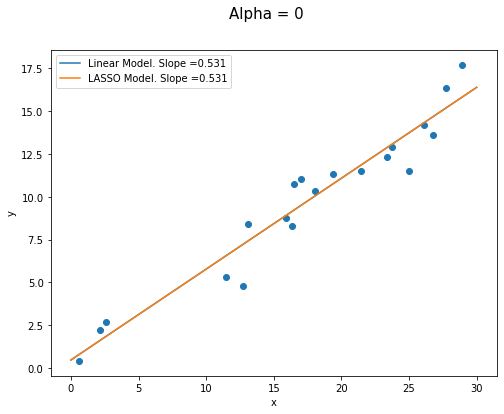

DATA:
╒════╤═══════════╤══════════╕
│    │         x │        y │
╞════╪═══════════╪══════════╡
│  0 │ 16.4644   │ 10.7263  │
├────┼───────────┼──────────┤
│  1 │ 21.4557   │ 11.5227  │
├────┼───────────┼──────────┤
│  2 │ 18.0829   │ 10.3545  │
├────┼───────────┼──────────┤
│  3 │ 16.3465   │  8.31915 │
├────┼───────────┼──────────┤
│  4 │ 12.7096   │  4.80183 │
├────┼───────────┼──────────┤
│  5 │ 19.3768   │ 11.342   │
├────┼───────────┼──────────┤
│  6 │ 13.1276   │  8.42824 │
├────┼───────────┼──────────┤
│  7 │ 26.7532   │ 13.6344  │
├────┼───────────┼──────────┤
│  8 │ 28.9099   │ 17.7247  │
├────┼───────────┼──────────┤
│  9 │ 11.5032   │  5.29726 │
├────┼───────────┼──────────┤
│ 10 │ 23.7518   │ 12.9216  │
├────┼───────────┼──────────┤
│ 11 │ 15.8668   │  8.74624 │
├────┼───────────┼──────────┤
│ 12 │ 17.0413   │ 11.0534  │
├────┼───────────┼──────────┤
│ 13 │ 27.7679   │ 16.3533  │
├────┼───────────┼──────────┤
│ 14 │  2.13108  │  2.22049 │
├────┼───────────┼──────────┤
│ 15

In [2]:
elastic_plot(alpha=0, legend=True)

# ElasticNet

Model: 

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$

ElasticNet is a combination of LASSO and Ridge, minimizing

$$
\sum \bigg(y-\hat{y} \bigg)^2 + \alpha (1-l_1) \bigg( w_1^2+w_2^2 \bigg) + \alpha l_1 \bigg( |w_1|+|w_2| \bigg),
$$
  
  - If $l_1 = 1$: We have LASSO
  - If $l_1 = 0$: We have Ridge
  - If $\alpha =0 $, we have a linear model. 

In [3]:
#elastic(alpha=.05, coef=[0, 0, 4, 3, 0, 1, 0, 3, 0 , 6, 0, 0, 0, 5, 1])
elastic(alpha=.1, coef=[0, 4, 0, 3, 0, 7])

|              |        w1 |      w2 |       w3 |      w4 |        w5 |      w6 |
|--------------|-----------|---------|----------|---------|-----------|---------|
| Truth        |  0        | 4       | 0        | 3       | 0         | 7       |
| Linear Model | -0.244061 | 3.54013 | 0.221939 | 2.6042  | 0.0982158 | 6.83617 |
| LASSO        | -0        | 2.65623 | 0        | 1.84839 | 0         | 5.80624 |


## 2. Predicting Boston Housing Price

We predict housing prices in Boston using linear model, ElasticNet and Random Forest. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target

#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

### Data Description

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Linear Model

**On Original Data**

In [6]:
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']

#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

coef1 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model': 'Linear',
                      'Data': 'Original'
                    })


print('R2 of Linear Model:',r2_score(y_test, model.predict(X_test)))

from sklearn.linear_model import ElasticNet
model = ElasticNet(l1_ratio=1, alpha=1.216)
model.fit(X_train, y_train)

coef2 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model':'LASSO',
                      'Data': 'Original'
                    })

print('R2 of LASSO:', r2_score(y_test, model.predict(X_test)))

R2 of Linear Model: 0.16682125146939064
R2 of LASSO: 0.6428736650944249


In [7]:
coef = pd.concat([coef1, coef2], ignore_index=True, axis=1)
coef = coef.drop([2, 3, 4, 6, 7], axis=1)
coef.columns = ['Variable','Linear Model', 'LASSO']
coef

,Variable,Linear Model,LASSO
0,CRIM,0.651033,0.000005
1,ZN,0.060976,0.075309
2,INDUS,-0.077244,-0.000000
3,CHAS,12.473065,0.000000
4,NOX,-11.575379,-0.000000
5,RM,8.523281,3.202072
6,AGE,-0.054629,0.011858
7,DIS,-1.720972,-0.627615
8,RAD,-0.239981,0.262110
9,TAX,0.003134,-0.008747


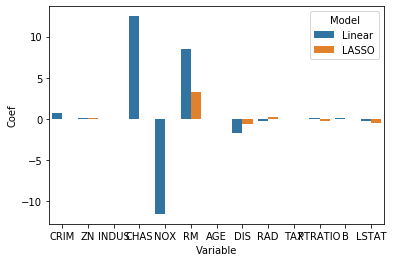

In [8]:
coef = pd.concat([coef1, coef2], ignore_index=True)
coef

import seaborn as sns
ax = sns.barplot(x="Variable", y="Coef", hue = 'Model', data=coef)

**On Noised Data**

We added noise to the data then rerun linear model and lasso to see how the noise affects these two models.

In [9]:
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']

newX = pd.concat([newX, pd.DataFrame(np.random.random([newX.shape[0], 20000]), index=newX.index)], axis=1)
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

coef3 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model': 'Linear',
                      'Data': 'Noised'
                    })


print('R2 of Linear Model:',r2_score(y_test, model.predict(X_test)))

from sklearn.linear_model import ElasticNet
model = ElasticNet(l1_ratio=1, alpha=1.216)
model.fit(X_train, y_train)

coef4 = pd.DataFrame({'Variable':X_train.columns, 
                     'Coef':model.coef_,
                      'Model':'LASSO',
                      'Data': 'Noised'
                    })

print('R2 of LASSO:', r2_score(y_test, model.predict(X_test)))

R2 of Linear Model: 0.4758530983116833
R2 of LASSO: 0.6428736650944249


### 3. Predicting NBA Player Salary

The data can be found from Blackboard or [here](https://www.kaggle.com/aishjun/nba-salaries-prediction-in-20172018-season) 

In [10]:
df = pd.read_csv('nba_salary.csv')
df = df.dropna()
newY=df['Salary']
newX=df.drop(['Player','Salary','NBA_DraftNumber','NBA_Country','Tm'] ,axis=1)
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=9)

#### Linear Model

In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

0.34024791460147585


#### Lasso

In [12]:
model = ElasticNet(l1_ratio=1, tol=1)
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

0.3822431684376767


# Logistic Regression

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

C:\Users\sonou\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_informative=2, n_redundant=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


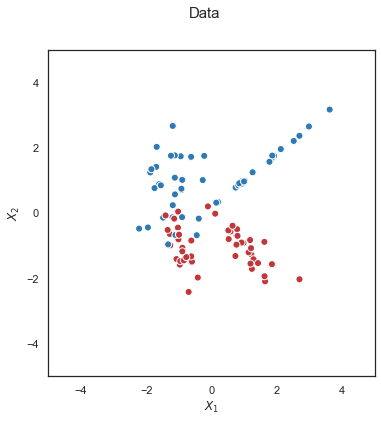

In [33]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white")

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.suptitle('Data', fontsize=15)
ax.figure.savefig('lr.png', dpi=100)

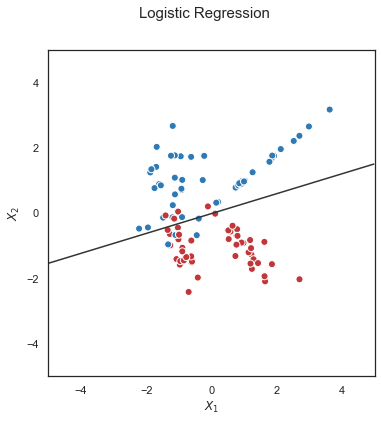

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.suptitle('Logistic Regression', fontsize=15)
ax.figure.savefig('lr2.png', dpi=100)

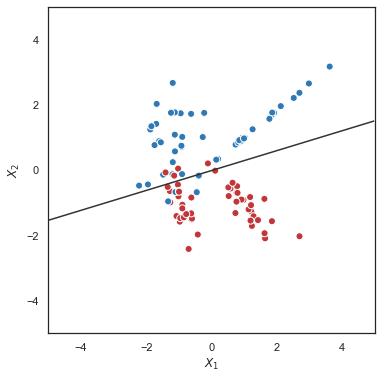

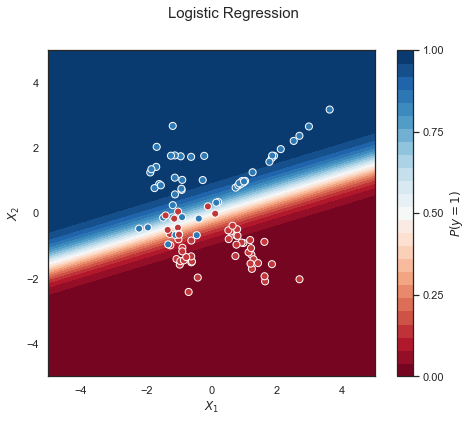

In [34]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.suptitle('Logistic Regression', fontsize=15)
ax.figure.savefig('lr3.png', dpi=100)

# Logistic Regression with LASSO

C:\Users\sonou\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_informative=2, n_redundant=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


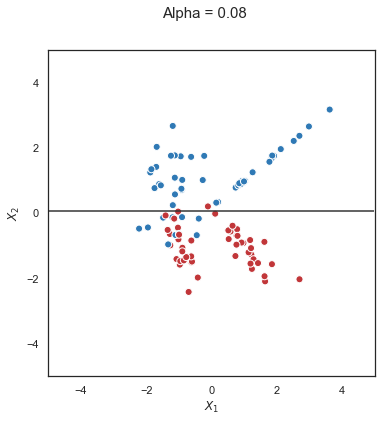

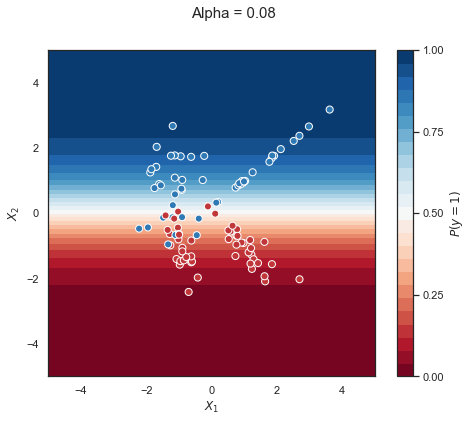

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)

alp = .08

clf = SGDClassifier(loss='log', penalty='elasticnet', alpha=alp, l1_ratio=1)
clf.fit(X[:100], y[:100])

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.suptitle('Alpha = '+str(alp), fontsize=15)
ax.figure.savefig('lr'+str(alp)+'.png', dpi = 100)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.suptitle('Alpha = '+str(alp), fontsize=15)
ax.figure.savefig('lr_prob'+str(alp)+'.png', dpi = 100)